## KNN Exercises

use titanic dataset

In [37]:
# Tabular data friends:
import pandas as pd
import numpy as np

# Data viz:
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn stuff:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix#, plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
# Data acquisition
from pydataset import data


from acquire import get_iris_data
from acquire import get_titanic_data
from acquire import get_telco_data
from prepare import split_data

import os
import acquire
from prepare import clean_titanic
from env import get_db_url

ImportError: cannot import name 'clean_titanic' from 'prepare' (/Users/derekbixby/codeup-data-science/classification_exercises/prepare.py)

In [6]:
titanic_df = get_titanic_data()
titanic_df.head()


,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [19]:
def clean_titanic(df):

    df = df.drop(columns =['embark_town','class','deck'])

    df.embarked = df.embarked.fillna(value='S')

    dummy_df = pd.get_dummies(df[['sex','embarked']], drop_first=True)
    df = pd.concat([df, dummy_df], axis=1)
    return df

In [20]:
titanic_df = clean_titanic(titanic_df)

In [21]:
titanic_df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone,sex_male,embarked_Q,embarked_S
0,0,0,3,male,22.0,1,0,7.2500,S,0,1,0,1
1,1,1,1,female,38.0,1,0,71.2833,C,0,0,0,0
2,2,1,3,female,26.0,0,0,7.9250,S,1,0,0,1
3,3,1,1,female,35.0,1,0,53.1000,S,0,0,0,1
4,4,0,3,male,35.0,0,0,8.0500,S,1,1,0,1


1. Fit a K-Nearest Neighbors classifier to your training sample and transform (i.e. make predictions on the training sample)

In [22]:
train, validate, test = split_data(titanic_df, col_to_stratify='survived')

In [23]:
train.shape, validate.shape, test.shape

((534, 13), (178, 13), (179, 13))

In [26]:
X_train = train.drop(columns=['survived', 'passenger_id', 'sex', 'embarked', 'age'])
y_train = train.survived

X_validate = validate.drop(columns=['survived', 'passenger_id', 'sex', 'embarked','age'])
y_validate = validate.survived

X_test = test.drop(columns=['survived', 'passenger_id', 'sex', 'embarked','age'])
y_test = test.survived


In [27]:
X_train.head()

,pclass,sibsp,parch,fare,alone,sex_male,embarked_Q,embarked_S
853,1,0,1,39.4000,0,0,0,1
324,3,8,2,69.5500,0,1,0,1
550,1,0,2,110.8833,0,1,0,0
735,3,0,0,16.1000,1,1,0,1
316,2,1,0,26.0000,0,0,0,1


In [28]:
print(f"""train:
{train.columns.to_list()} 
_____________________________________________
X_train:
{X_train.columns.to_list()}
_____________________________________________
X_validate:
{X_validate.columns.to_list()}
""")

train:
['passenger_id', 'survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'alone', 'sex_male', 'embarked_Q', 'embarked_S'] 
_____________________________________________
X_train:
['pclass', 'sibsp', 'parch', 'fare', 'alone', 'sex_male', 'embarked_Q', 'embarked_S']
_____________________________________________
X_validate:
['pclass', 'sibsp', 'parch', 'fare', 'alone', 'sex_male', 'embarked_Q', 'embarked_S']



In [29]:
knn5 = KNeighborsClassifier(n_neighbors=5, weights='uniform')

knn5.fit(X_train, y_train)

KNeighborsClassifier()

In [32]:
y_pred5 = knn5.predict(X_train)


In [33]:
y_pred5[:5]

array([1, 0, 1, 0, 1])

In [34]:
y_pred_proba = knn5.predict_proba(X_train)

In [35]:
y_pred_proba[:5]

array([[0.2, 0.8],
       [1. , 0. ],
       [0.4, 0.6],
       [1. , 0. ],
       [0.2, 0.8]])

In [36]:
knn5.classes_


array([0, 1])

2. Evaluate your results using the model score, confusion matrix, and classification report.

In [38]:
confusion_matrix(y_train, y_pred5)

array([[286,  43],
       [ 54, 151]])

In [39]:
pd.crosstab(y_train, y_pred5)

col_0,0,1
survived,,
0,286,43
1,54,151


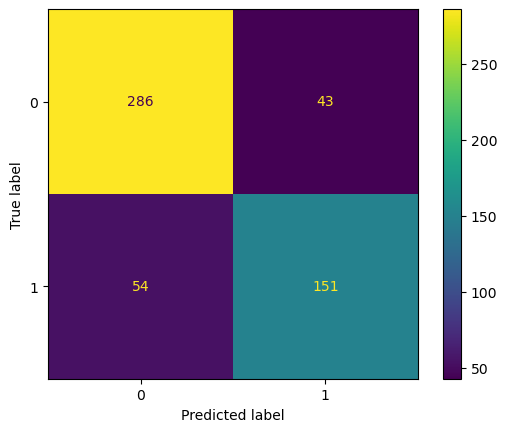

In [40]:
ConfusionMatrixDisplay.from_estimator(knn5, X_train, y_train)


In [49]:
print(classification_report(y_train, y_pred5,))


              precision    recall  f1-score   support

           0       0.84      0.87      0.86       329
           1       0.78      0.74      0.76       205

    accuracy                           0.82       534
   macro avg       0.81      0.80      0.81       534
weighted avg       0.82      0.82      0.82       534



In [44]:
knn5.score(X_train, y_train)

0.8183520599250936

In [45]:
knn5.score(X_validate, y_validate)

0.8258426966292135

3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [50]:
class_knn5 = classification_report(y_train, y_pred5, output_dict=True)

In [54]:
precision = print('precision', class_knn5['macro avg']['precision'])
precision
recall = print('recall', class_knn5['macro avg']['recall'])
recall
f1 = print('f1', class_knn5['macro avg']['f1-score'])
f1

    

precision 0.8097634930260764
recall 0.8029431388538809
f1 0.8059498522089978


4. Run through steps 1-3 setting k to 10

In [55]:
knn10 = KNeighborsClassifier(n_neighbors=10, weights='uniform')

knn10.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [62]:
y_pred10 = knn10.predict(X_train)


In [63]:
y_pred_proba = knn10.predict_proba(X_train)

In [64]:
knn10.classes_

array([0, 1])

In [66]:
confusion_matrix(y_train, y_pred10)

array([[288,  41],
       [ 71, 134]])

In [67]:
pd.crosstab(y_train, y_pred10)


col_0,0,1
survived,,
0,288,41
1,71,134


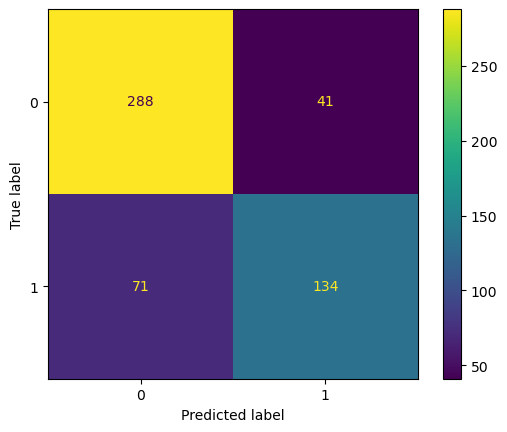

In [68]:
ConfusionMatrixDisplay.from_estimator(knn10, X_train, y_train)

In [69]:
print(classification_report(y_train, y_pred10,))


              precision    recall  f1-score   support

           0       0.80      0.88      0.84       329
           1       0.77      0.65      0.71       205

    accuracy                           0.79       534
   macro avg       0.78      0.76      0.77       534
weighted avg       0.79      0.79      0.79       534



In [70]:
knn10.score(X_train, y_train)

0.7902621722846442

In [71]:
knn10.score(X_validate, y_validate)

0.7808988764044944

In [73]:
class_knn10 = classification_report(y_train, y_pred5, output_dict=True)

precision = print('precision', class_knn10['macro avg']['precision'])
precision
recall = print('recall', class_knn10['macro avg']['recall'])
recall
f1 = print('f1', class_knn10['macro avg']['f1-score'])
f1

precision 0.8097634930260764
recall 0.8029431388538809
f1 0.8059498522089978


5. Run through steps 1-3 setting k to 20

In [74]:
knn20 = KNeighborsClassifier(n_neighbors=20, weights='uniform')

knn20.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [75]:
y_pred20 = knn20.predict(X_train)


In [76]:
y_pred_proba = knn20.predict_proba(X_train)

In [77]:
confusion_matrix(y_train, y_pred20)

array([[279,  50],
       [ 97, 108]])

In [78]:
pd.crosstab(y_train, y_pred20)

col_0,0,1
survived,,
0,279,50
1,97,108


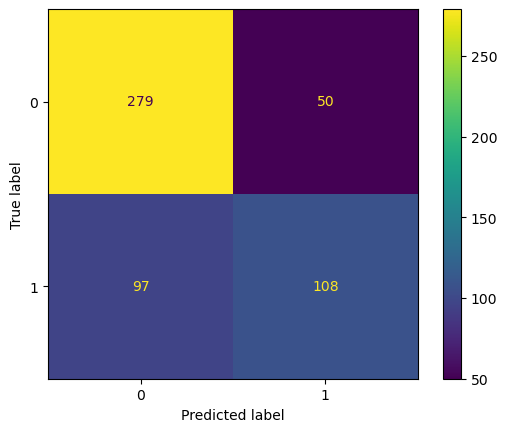

In [79]:
ConfusionMatrixDisplay.from_estimator(knn20, X_train, y_train)

In [80]:
print(classification_report(y_train, y_pred20,))

              precision    recall  f1-score   support

           0       0.74      0.85      0.79       329
           1       0.68      0.53      0.60       205

    accuracy                           0.72       534
   macro avg       0.71      0.69      0.69       534
weighted avg       0.72      0.72      0.72       534



In [81]:
knn20.score(X_train, y_train)

0.7247191011235955

In [82]:
knn20.score(X_validate, y_validate)

0.7359550561797753

In [83]:
class_knn20 = classification_report(y_train, y_pred5, output_dict=True)

precision = print('precision', class_knn20['macro avg']['precision'])
precision
recall = print('recall', class_knn20['macro avg']['recall'])
recall
f1 = print('f1', class_knn20['macro avg']['f1-score'])
f1

precision 0.8097634930260764
recall 0.8029431388538809
f1 0.8059498522089978


6. What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

The KNN 5 seems to perform best with the in-sample data

7. Which model performs best on our out-of-sample data from validate?

KNN 5 also performs best on the validate data